<a href="https://colab.research.google.com/github/Vagarh/IUdigital/blob/main/CED_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unidad 3**



*   Análisis multivariado
*   Tipificación de relaciones entre conjuntos de datos
*   Covarianza, corelación, valores de significancia y su importancia en la declaración de la hipótesis nula
*   Agrupación discriminación y análisis de agregación de datos



# Problema

Un banco tiene en una tabla los siguientes datos de 200 clientes: edad, 
saldo promedio en ahorro y si les ha sido aprobado o no un crédito.
 
¿Podría identificarse si existe una relación entre la edad y el saldo 
promedio en ahorro?

# Carga de datos

In [ ]:
import pandas as pd

#Tener en cuenta separador
data = pd.read_csv('drive/MyDrive/.../data.csv')
data

In [ ]:
import pandas as pd

#Tener en cuenta separador
data = pd.read_csv('data.csv', sep=";")
data

,Id,Edad,Ahorro,Préstamo
0,1,22,691,NO
1,2,39,1305,NO
2,3,66,3474,SI
3,4,45,2185,NO
4,5,39,1773,SI
...,...,...,...,...
195,196,62,3051,SI
196,197,22,1380,NO
197,198,59,3044,SI
198,199,21,1751,SI


In [ ]:
#opción para cargar sin tener en cuenta primera fila de nombre de columnas
data_x = pd.read_csv("data.csv", sep=";", header=None)
data_x

,0,1,2,3
0,Id,Edad,Ahorro,Préstamo
1,1,22,691,NO
2,2,39,1305,NO
3,3,66,3474,SI
4,4,45,2185,NO
...,...,...,...,...
196,196,62,3051,SI
197,197,22,1380,NO
198,198,59,3044,SI
199,199,21,1751,SI


In [ ]:
#opción para cargar sin tener en cuenta primera fila de nombre de columnas, agregando manualmente nombre de columnas
data_x = pd.read_csv("data.csv", sep=";", header=None, names=["a","b","c","d"])
data_x

,a,b,c,d
0,Id,Edad,Ahorro,Préstamo
1,1,22,691,NO
2,2,39,1305,NO
3,3,66,3474,SI
4,4,45,2185,NO
...,...,...,...,...
196,196,62,3051,SI
197,197,22,1380,NO
198,198,59,3044,SI
199,199,21,1751,SI


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        200 non-null    int64 
 1   Edad      200 non-null    int64 
 2   Ahorro    200 non-null    int64 
 3   Préstamo  200 non-null    object
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
#información básica
data.describe()

,Id,Edad,Ahorro
count,200.000000,200.000000,200.000000
mean,100.500000,45.025000,2574.060000
std,57.879185,15.740495,1102.348743
min,1.000000,18.000000,518.000000
25%,50.750000,31.000000,1704.500000
50%,100.500000,46.000000,2585.500000
75%,150.250000,58.000000,3466.500000
max,200.000000,70.000000,4985.000000


In [ ]:
data["Préstamo"].describe()

count     200
unique      2
top        NO
freq      123
Name: Préstamo, dtype: object

In [ ]:
#renombrando columnas
data.columns = ["Id","Edad","Ahorro", "Préstamo"]
data

,Id,Edad,Ahorro,Préstamo
0,1,22,691,NO
1,2,39,1305,NO
2,3,66,3474,SI
3,4,45,2185,NO
4,5,39,1773,SI
...,...,...,...,...
195,196,62,3051,SI
196,197,22,1380,NO
197,198,59,3044,SI
198,199,21,1751,SI


In [ ]:
data.head()

,Id,Edad,Ahorro,Préstamo
0,1,22,691,NO
1,2,39,1305,NO
2,3,66,3474,SI
3,4,45,2185,NO
4,5,39,1773,SI


# Análisis

¿Podría identificarse si existe una relación entre la edad y el saldo promedio en ahorro?

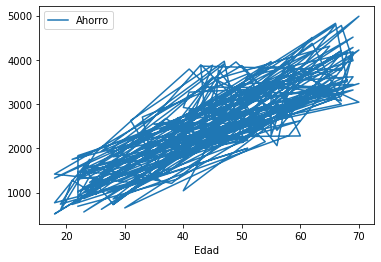

In [ ]:
#gráfico por defecto: línea
data.plot(x="Edad", y="Ahorro")

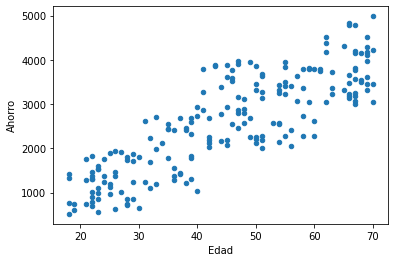

In [ ]:
'''
con el parámetro "kind" podemos elegir entre varios tipos:

‘line’ : line plot (default)
‘bar’ : vertical bar plot
‘barh’ : horizontal bar plot
‘hist’ : histogram
‘box’ : boxplot
‘kde’ : Kernel Density Estimation plot
‘density’ : same as ‘kde’
‘area’ : area plot
‘pie’ : pie plot
‘scatter’ : scatter plot (DataFrame only)
‘hexbin’ : hexbin plot (DataFrame only)

doc: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
'''
#En este caso, para analizar cómo se relacionan ambas variables, nos interesa el gráfico de dispersión
data.plot(x="Edad", y="Ahorro", kind="scatter")

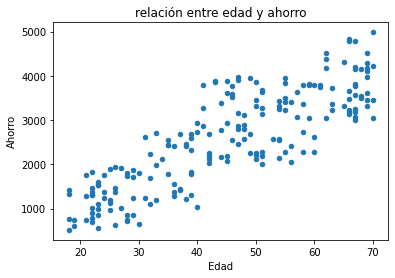

In [ ]:
data.plot(x="Edad", y="Ahorro", kind="scatter", title="relación entre edad y ahorro")

**Análisis**: Aquí podemos identificar que efectivamente hay una relación entre la edad y el valor del ahorro. A menor edad, los valores de ahorro disminuyen y a mayor edad, aumentan. 

In [ ]:
data

,Id,Edad,Ahorro,Préstamo
0,1,22,691,NO
1,2,39,1305,NO
2,3,66,3474,SI
3,4,45,2185,NO
4,5,39,1773,SI
...,...,...,...,...
195,196,62,3051,SI
196,197,22,1380,NO
197,198,59,3044,SI
198,199,21,1751,SI


In [ ]:
#Añadiendo otra variable para categorizar los datos --> Préstamo

'''
Desde pandas, debemos hacer una operación inicial: agrupamiento --> groupby

Usaremos la variable préstamos como variable de categorización --> grupos: sí, no
'''

datos_agrupados = data.groupby("Préstamo")
datos_agrupados #Se genera un objeto iterable

In [ ]:
for key,group in datos_agrupados:
  print(key,group)

NO       Id  Edad  Ahorro Préstamo
0      1    22     691       NO
1      2    39    1305       NO
3      4    45    2185       NO
5      6    62    4505       NO
7      8    29     856       NO
..   ...   ...     ...      ...
190  191    42    2183       NO
191  192    41    2855       NO
193  194    67    4776       NO
194  195    23     864       NO
196  197    22    1380       NO

[123 rows x 4 columns]
SI       Id  Edad  Ahorro Préstamo
2      3    66    3474       SI
4      5    39    1773       SI
6      7    55    3408       SI
9     10    44    3385       SI
10    11    63    3365       SI
..   ...   ...     ...      ...
192  193    69    3981       SI
195  196    62    3051       SI
197  198    59    3044       SI
198  199    21    1751       SI
199  200    61    3786       SI

[77 rows x 4 columns]


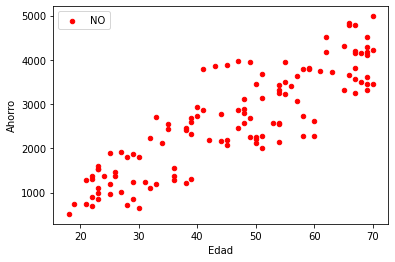

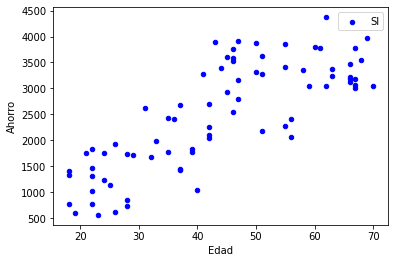

In [ ]:
import matplotlib.pyplot as plt

colores = {"SI":"blue", "NO":"red"} #definiendo colores para cada grupo
for opcion, grupo in datos_agrupados: #iterando sobre los grupos
  grupo.plot(kind="scatter", x="Edad", y="Ahorro", label=opcion, color=colores[opcion]) #graficando cada grupo

plt.show()

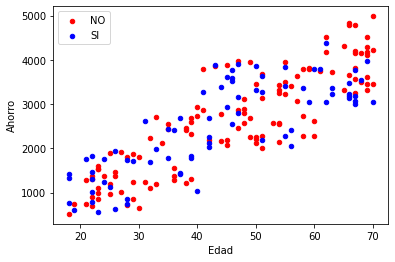

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() #creando subplot para combinar gráficos
colores = {"SI":"blue", "NO":"red"}
for opcion, grupo in datos_agrupados:
  grupo.plot(ax=ax, kind="scatter", x="Edad", y="Ahorro", label=opcion, color=colores[opcion]) #se agrega el parámetro ax para definir el mismo objeto "eje" para todos los gráficos

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


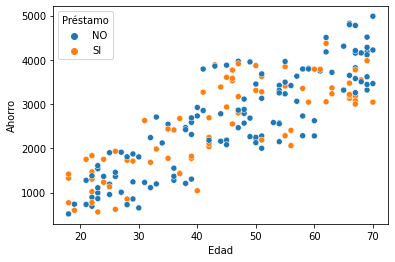

In [ ]:
#Otra manera de graficar con scatter y categorización por columna adicional --> Seaborn

#con scatterplot --> doc: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
import seaborn as sns
sns.scatterplot("Edad", "Ahorro", data=data, hue="Préstamo") #parámetro hue --> variable de categorización; data --> dataframe


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


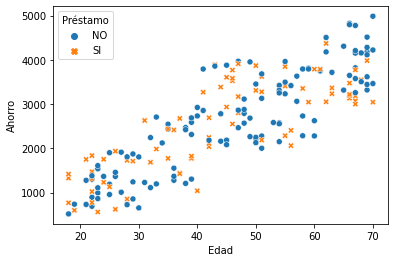

In [ ]:
#Agregando estilos a variable de categorización
sns.scatterplot("Edad", "Ahorro", data=data, hue="Préstamo", style="Préstamo")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


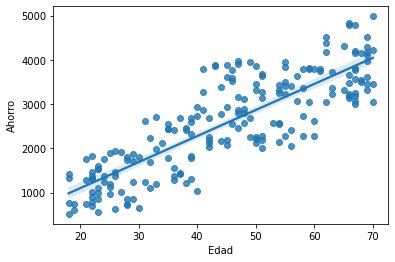

In [ ]:
#gráfico de regresión --> estima el modelo de regresión
#doc: https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot
sns.regplot("Edad", "Ahorro", data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


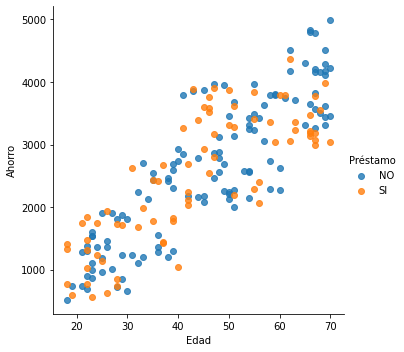

In [ ]:
#con lmplot que combina regplot y facetgrid
sns.lmplot("Edad", "Ahorro", data=data, hue="Préstamo", fit_reg=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


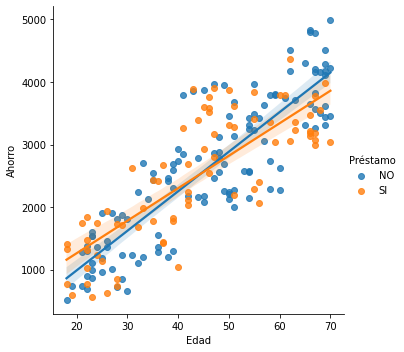

In [ ]:
import seaborn as sns
sns.lmplot("Edad", "Ahorro", data=data, hue="Préstamo", fit_reg=True) #Añadiendo modelo de regresión

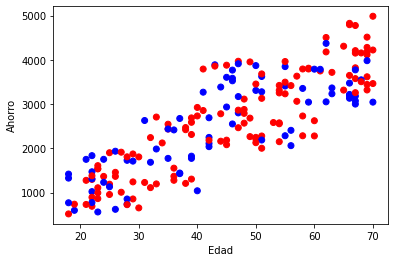

In [ ]:
#Con matplotlib

fig,ax = plt.subplots()
colores = {"SI":"blue", "NO":"red"}
ax.scatter(data["Edad"], data["Ahorro"], c=data["Préstamo"].map(colores))
plt.xlabel("Edad")
plt.ylabel("Ahorro")
plt.show()

# Covarianza

In [ ]:
#Covarianza con pandas
data

,Id,Edad,Ahorro,Préstamo
0,1,22,691,NO
1,2,39,1305,NO
2,3,66,3474,SI
3,4,45,2185,NO
4,5,39,1773,SI
...,...,...,...,...
195,196,62,3051,SI
196,197,22,1380,NO
197,198,59,3044,SI
198,199,21,1751,SI


In [ ]:
data.cov() #Matriz de covarianza --> doc: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html

,Id,Edad,Ahorro
Id,3350.000000,-17.118090,-1.312925e+03
Edad,-17.118090,247.763191,1.459085e+04
Ahorro,-1312.924623,14590.852764,1.215173e+06


In [ ]:
print(data[["Edad","Ahorro"]].cov()) #Consultando sólo para algunas columnas: Edad y ahorro

                Edad        Ahorro
Edad      247.763191  1.459085e+04
Ahorro  14590.852764  1.215173e+06


In [ ]:
datos_covarianza = data[["Edad","Ahorro"]].cov() 

In [ ]:
#Calculando la matriz de covarianza con numpy y entendiendo sus resultados: https://www.statology.org/covariance-matrix-python/

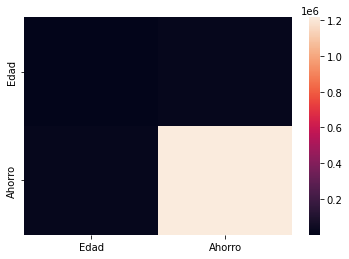

In [ ]:
#Mapa de calor: visualización de matriz de covarianza
sns.heatmap(datos_covarianza)

In [ ]:
#Visualizando otro set de datos y calculando matriz de covarianza con numpy
import numpy as np

math = [84, 82, 81, 89, 73, 94, 92, 70, 88, 95]
science = [85, 82, 72, 77, 75, 89, 95, 84, 77, 94]
history = [97, 94, 93, 95, 88, 82, 78, 84, 69, 78]

data_x = np.array([math, science, history])

np.cov(data_x, bias=True)

array([[ 64.96,  33.2 , -24.44],
       [ 33.2 ,  56.4 , -24.1 ],
       [-24.44, -24.1 ,  75.56]])

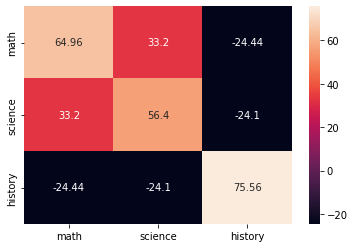

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(data_x, bias=True)
labs = ['math', 'science', 'history']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

# Análisis de correlación

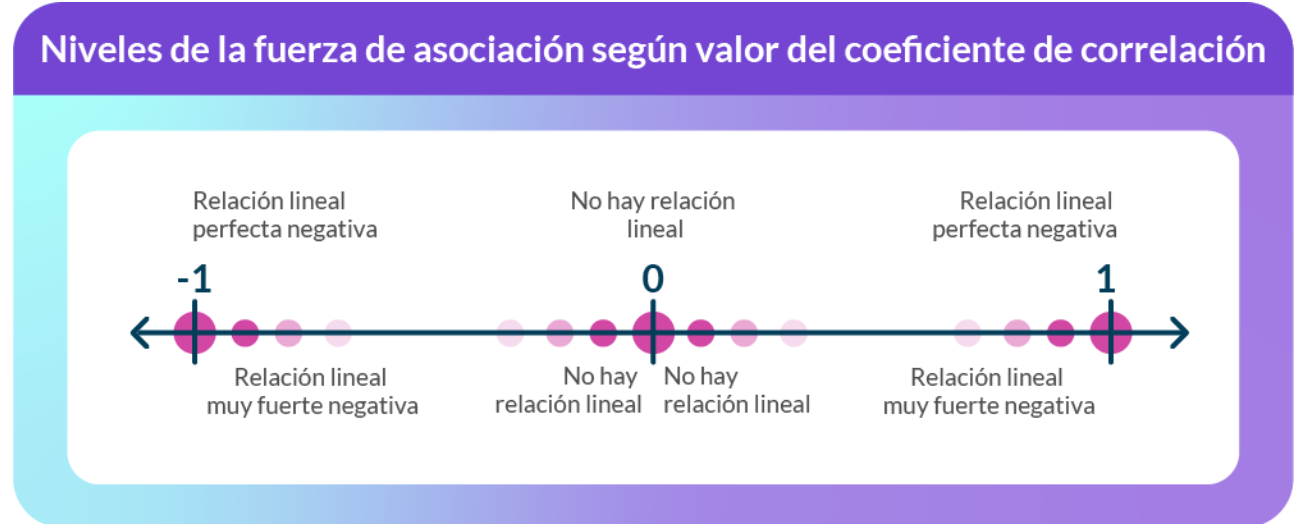



```
Problema 2

Considerando el mismo conjunto de datos del problema anterior, asume la siguiente hipótesis nula:

H0 = No existe una relación lineal entre la edad y el saldo promedio de los ahorros de los clientes del banco.­

¿Es posible rechazar o no esta hipótesis nula?, ¿se debe considerar como hipótesis alternativa?, ¿cuál sería esa hipótesis alternativa?

```



In [ ]:
#Solución a problema 2

data

,Id,Edad,Ahorro,Préstamo
0,1,22,691,NO
1,2,39,1305,NO
2,3,66,3474,SI
3,4,45,2185,NO
4,5,39,1773,SI
...,...,...,...,...
195,196,62,3051,SI
196,197,22,1380,NO
197,198,59,3044,SI
198,199,21,1751,SI


In [ ]:
data_objetivo = data[["Edad","Ahorro"]]
data_objetivo

,Edad,Ahorro
0,22,691
1,39,1305
2,66,3474
3,45,2185
4,39,1773
...,...,...
195,62,3051
196,22,1380
197,59,3044
198,21,1751


In [ ]:
#matriz de covarianza: doc --> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html
mat_cov = data_objetivo.cov()
print(mat_cov)

                Edad        Ahorro
Edad      247.763191  1.459085e+04
Ahorro  14590.852764  1.215173e+06


In [ ]:
'''
Se observa que la covarianza en el conjunto de datos (Edad y Ahorro) es positiva, es decir,
se identifica una relación lineal ascendente, ya que las dos variables crecen en el mismo 
sentido, lo que se evidencia en el gráfico de dispersión. 

Sin embargo, el número obtenido del cálculo es difícil de interpretar por su dependencia de las unidades
en las que se representan las variables, por esta razón, en su lugar, se debe trabajar con la covarianza
y el coeficiente de regresión lineal
'''

#Calculando matriz de correlación --> doc: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
print("por Pearson")
pearson_mat_corr = data_objetivo.corr(method="pearson") #parámetro "method" para determinar el método
print(pearson_mat_corr)

print()
print("por Spearman")
spearman_mat_corr = data_objetivo.corr(method="spearman")
print(spearman_mat_corr)

por Pearson
            Edad    Ahorro
Edad    1.000000  0.840898
Ahorro  0.840898  1.000000

por Spearman
            Edad    Ahorro
Edad    1.000000  0.828058
Ahorro  0.828058  1.000000


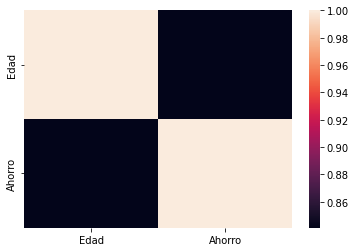

In [ ]:
sns.heatmap(pearson_mat_corr)

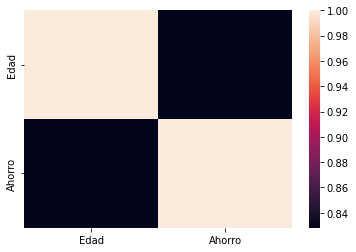

In [ ]:
sns.heatmap(spearman_mat_corr)



> De acuerdo con el resultado, y considerando el concepto de la fuerza de asociación, se puede observar que las variables presentan una fuerte relación lineal positiva. 



In [ ]:
#Calculando coeficiente de correlación y valor p con scipy para hacer pruebas --> aceptar o rechazar hipótesis nula
#documentación funciones de correlación: https://docs.scipy.org/doc/scipy/reference/stats.html#correlation-functions

import scipy.stats as stats

#Pearson
pearson_r,pearson_p = stats.pearsonr(data_objetivo["Edad"], data_objetivo["Ahorro"])
print(f"r:{pearson_r} - p:{pearson_p}")

#Spearman
spearman_r,spearman_p = stats.spearmanr(data_objetivo["Edad"], data_objetivo["Ahorro"])
print(f"rho:{spearman_r} - p:{spearman_p}")

r:0.8408979062831967 - p:1.0746702374083095e-54
rho:0.8280578662728004 - p:1.1853904387424998e-51




> Observemos que en este resulatdo el coeficiente de correlación es muy cercano a 1 (0.84), además, presente un valor p inferior a 0.05 (5%), lo que nos permite rechazar la hipótesis nula por su nivel de significancia.





> Más información sobre cálculos de correlación con Python: https://realpython.com/numpy-scipy-pandas-correlation-python/

